In [1]:
%load_ext autoreload
%autoreload 2

In [90]:
import matplotlib.pyplot as plt

In [26]:
import json
import pandas as pd
with open('ejecuciones/ExplotacionReflectionGemini/heuristics_data.json', 'r') as file:
    heuristics_data = json.load(file)
with open('ejecuciones/ExplotacionReflectionGemini/final_information.json', 'r') as file:
    final_information = json.load(file)

In [27]:
best = pd.read_csv("problems/jssp/greedy_solution.csv")

In [ ]:
import numpy as np

def get_scores (path):
    with open(f'ejecuciones/{path}/heuristics_data.json', 'r') as file:
        heuristics_data = json.load(file)

    best = pd.read_csv("problems/jssp/greedy_solution.csv")
    epsilon = 0.1

    scores = {}

    values_per_instance = {}

    for heuristic in heuristics_data:
        if heuristic['evaluation'] not in ['Code Error', 'Infeasible']:
            for instance, evaluation in heuristic['evaluation'].items():
                if instance not in values_per_instance:
                    values_per_instance[instance] = {'Makespan': [], 'Balance': [], 'Separation': []}
                for of_name, of_value in evaluation.items():
                    values_per_instance[instance][of_name].append(of_value)

    for instance, evaluation in heuristic['evaluation'].items():
        for of_name, of_value in evaluation.items():
            values = values_per_instance[instance][of_name]
            values_per_instance[instance][of_name] = {'Mean' : np.mean(values), 'STD': np.std(values)}

    for heuristic in heuristics_data:
        if heuristic['evaluation'] not in ['Code Error', 'Infeasible']:
            scores[heuristic['id']] = {'id': heuristic['id'], 'Makespan': 0, 'Balance': 0, 'Separation': 0, 'Generation': heuristic['generation'], 'Mean': 0}
            for instance_name, evaluation in heuristic['evaluation'].items():
                for of_name, of_value in evaluation.items():
                        scores[heuristic['id']][of_name] += (-(of_value - values_per_instance[instance_name][of_name]['Mean']) / values_per_instance[instance_name][of_name]['STD']) #el objetivo es minimizar en TODOS
            scores[heuristic['id']]['Makespan'] /= len(heuristic['evaluation'])
            scores[heuristic['id']]['Balance'] /= len(heuristic['evaluation'])
            scores[heuristic['id']]['Separation'] /= len(heuristic['evaluation'])
            scores[heuristic['id']]['Mean'] = (scores[heuristic['id']]['Makespan'] + scores[heuristic['id']]['Balance'] + scores[heuristic['id']]['Separation']) / 3
    
    return scores

def get_pareto_front(scores):
    pareto_front = []
    
    for _, candidate in scores.items():
        dominated = False
        for _, other in scores.items():
            if all(other[obj] >= candidate[obj] for obj in candidate) and any(other[obj] > candidate[obj] for obj in candidate):
                dominated = True
                break
        if not dominated:
            pareto_front.append(candidate)
    
    return pareto_front

def get_best_in(scores, ofs):
    max_mean = float('-inf')
    for candidate in scores:
        mean = 0
        for of in ofs:
            mean += candidate[of]
        mean /= len(ofs)
        if mean > max_mean:
            max_mean = mean
            best_h = candidate
    return best_h

In [75]:
scores = get_scores('ExplotacionReflectionGemini')
pareto_front = get_pareto_front(scores)

In [87]:
print(get_best_in(pareto_front, ['Makespan']))

{'id': 358, 'Makespan': np.float64(0.9624375714556809), 'Balance': np.float64(0.7533400471061164), 'Separation': np.float64(-0.5829072037248796), 'Generation': 16, 'Mean': np.float64(0.3776234716123059)}


In [ ]:
for generation in range(25):
    

In [64]:
pareto_generations = [0] * max(h['generation'] for h in heuristics_data)
for h in pareto_front:
    pareto_generations[h['Generation'] - 1] += 1

In [88]:
pareto_generations

[0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 3, 2, 2, 4, 4, 2, 5, 2, 2, 4, 8, 7, 6, 15]

In [ ]:
ids

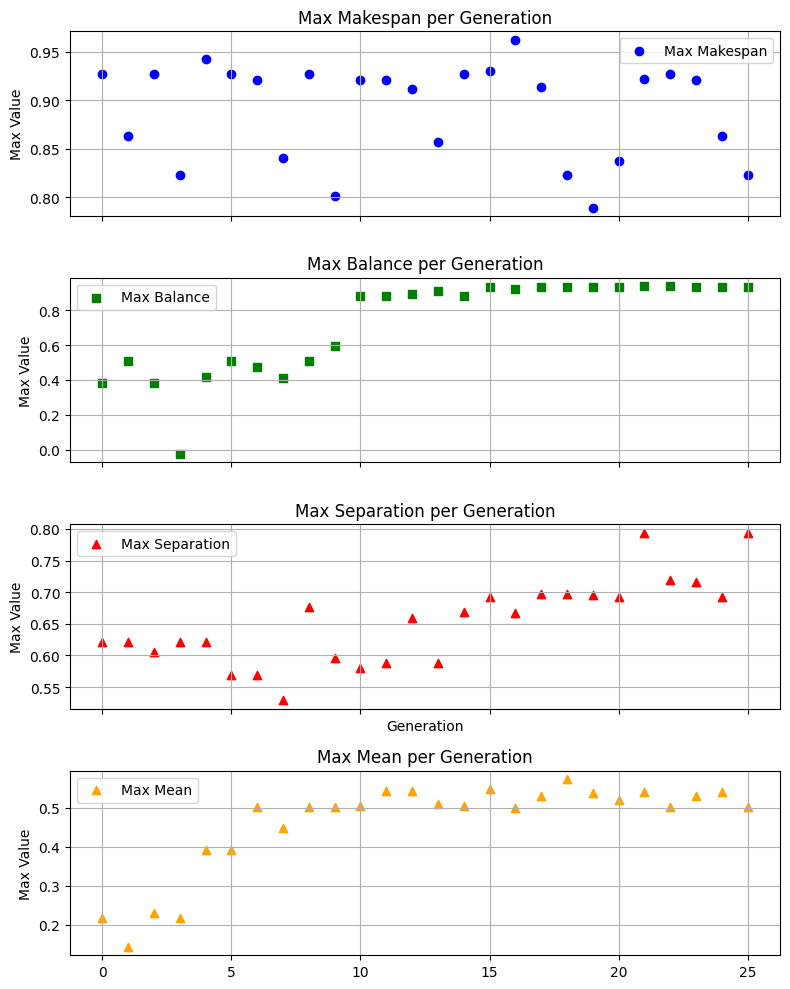

In [105]:
from collections import defaultdict

# Agrupar las métricas por generación
grouped_makespan = defaultdict(list)
grouped_balance = defaultdict(list)
grouped_separation = defaultdict(list)
grouped_means = defaultdict(list)
ids = list(scores.keys())
for g in ids:
    generation = scores[g]['Generation']
    grouped_makespan[generation].append(scores[g]['Makespan'])
    grouped_balance[generation].append(scores[g]['Balance'])
    grouped_separation[generation].append(scores[g]['Separation'])
    grouped_means[generation].append(scores[g]['Mean'])

# Obtener el máximo para cada generación
max_makespan = [max(grouped_makespan[gen]) for gen in sorted(grouped_makespan.keys())]
max_balance = [max(grouped_balance[gen]) for gen in sorted(grouped_balance.keys())]
max_separation = [max(grouped_separation[gen]) for gen in sorted(grouped_separation.keys())]
max_means = [max(grouped_means[gen]) for gen in sorted(grouped_means.keys())]

# Generar el gráfico
fig, axes = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# Graficar los valores
axes[0].scatter(sorted(grouped_makespan.keys()), max_makespan, marker='o', color='b', label="Max Makespan")
axes[1].scatter(sorted(grouped_balance.keys()), max_balance, marker='s', color='g', label="Max Balance")
axes[2].scatter(sorted(grouped_separation.keys()), max_separation, marker='^', color='r', label="Max Separation")
axes[3].scatter(sorted(grouped_means.keys()), max_means, marker='^', color='orange', label="Max Mean")

# Títulos y etiquetas
axes[0].set_title("Max Makespan per Generation")
axes[1].set_title("Max Balance per Generation")
axes[2].set_title("Max Separation per Generation")
axes[3].set_title("Max Mean per Generation")

# Etiquetas comunes
for ax in axes:
    ax.set_ylabel("Max Value")
    ax.legend()
    ax.grid(True)

axes[2].set_xlabel("Generation")

plt.tight_layout()
plt.show()



In [ ]:
from ejecuciones.ExplotacionReflectionGemini.heuristics.heuristic33 import heuristic
from nsga.NSGA_Evo_JSSP import NSGA_Evo_JSSP

NSGA = NSGA_Evo_JSSP('jssp', 5, 1)
instances = NSGA.get_instances()

c:\Users\Diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def f(instance, solution): #devuelve true si es feasible, y un mensaje con los fallos si está mal.
    def operation_feasibility(): #operaciones empiezan de 0
        for job, operations in solution.items():
            job_operations = instance['jobs'][job]
            for op_idx, op in enumerate(operations):
                assigned_machine = int(op['Assigned Machine'])
                job_machine_list, job_processing_times = job_operations[op_idx]
                if assigned_machine not in job_machine_list:
                    return False
                assigned_processing_time = op['Processing Time']
                if assigned_processing_time != job_processing_times[job_machine_list.index(assigned_machine)]:
                    return False
        return True

    def machine_feasibility(): #machine empieza de 0
        machine_operations = {int(machine): [] for machine in range(0, instance['n_machines'])}
        for job, operations in solution.items():
            for op in operations:
                assigned_machine = int(op['Assigned Machine'])
                start_time = op['Start Time']
                end_time = op['End Time']
                machine_op_list = machine_operations[assigned_machine]

                for existing_op in machine_op_list:
                    if not (end_time <= existing_op['Start Time'] or start_time >= existing_op['End Time']):
                        return False
                
                machine_op_list.append({'Start Time': start_time, 'End Time': end_time})
                machine_operations[assigned_machine] = machine_op_list

        return True

    def sequence_feasibility():
        for job, operations in solution.items():
            for op_idx in range(1, len(operations)):
                prev_op_end_time = operations[op_idx - 1]['End Time']
                curr_op_start_time = operations[op_idx]['Start Time']
                if curr_op_start_time < prev_op_end_time:
                    print(job, op_idx)
                    #return False
        return True
    
    def job_feasibility():
        if len(solution) != instance['n_jobs']:
            return False
        for job, operations in solution.items():
            if len(operations) != len(instance['jobs'][job]):
                return False
        return True
    
    sorted_solution = {}
    
    for job in sorted(solution.keys()):
        sorted_solution[job] = sorted(solution[job], key=lambda op: op['Operation'])
    solution = sorted_solution
    message = ''
    if not machine_feasibility():
        message += '\nThe heuristic does not ensure machine feasibility, as it allows multiple operations on the same machine, which is not possible.'
    if not operation_feasibility():
        message += '\nThe heuristic does not ensure operation feasibility, as it assigns incorrect machines or processing times to operations.'
    if not sequence_feasibility():
        message += '\nThe heuristic does not ensure sequence feasibility, as some operations of the same job are performed simultaneously, or later operations are scheduled before earlier ones.'
    if not job_feasibility():
        message += '\nThe heuristic does not ensure job feasibility, as some operations or jobs are missing in the solution.'
    if message == '':
        return True
    return message

In [ ]:
from ejecuciones.Exploration.heuristics.heuristic59 import heuristic

solutions = {}
for inst_name, inst_value in instances.items():
    solution = heuristic(inst_value)
    solutions[inst_name] = solution

In [ ]:
from utils.jssp.feasibility import feasibility

for solution in solutions.items():
    print(feasibility())

In [9]:
from ejecuciones.ExplotacionReflectionGemini.heuristics.heuristic33 import heuristic
from nsga.NSGA_Evo_JSSP import NSGA_Evo_JSSP

NSGA = NSGA_Evo_JSSP('jssp', 5, 1)
instances = NSGA.get_instances()
NSGA.init_population()

NSGA.Reader.get_crossoverI_prompt('long', NSGA.population[0], NSGA.population[0])

('You are an expert in the domain of optimization heuristics, helping to design heuristics that can effectively solve optimization problems.\nYour response outputs Python code and nothing else. Format your code as a Python code string: ```python ... ```.',
 'You are Albert Einstein, relativity theory developer, Your task is to write a function called \'heuristic\' for The Flexible Job Shop Scheduling Problem (FJSSP) is an optimization problem where jobs, consisting of multiple operations, must be scheduled on machines with specific processing times to minimize makespan, reduce idle time between operations in the same job, and balance machine load.\n\nEnsure that the following constraints are strictly followed:\n    -Operation feasibility: Each operation must be performed on the corresponding machine(s) and the processing time must align with the available machines.\n    -Machine feasibility: Machines can perform only one operation at a time, ensuring no overlap in their schedules.\n   